## Grabcut image segmentation on humerus Xray images

### Single image test

In [1]:
# from : https://docs.opencv.org/3.4/d8/d83/tutorial_py_grabcut.html
from PIL import Image
import matplotlib.pyplot as plt
import cv2 
import numpy as np
import os

In [5]:

# 1. get rectangle coordinates
image_path = "/home/clr/Thesis/augmentations/sample images/image1.png"
image = Image.open(image_path)
image_orig = np.array(image)
image_orig = cv2.cvtColor(image_orig, cv2.COLOR_BGR2GRAY)

contours, _ = cv2.findContours(np.uint8(image_orig), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

best_rect = None
best_rect_area = 0

for contour in contours:
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box_area = rect[1][0] * rect[1][1]

    if box_area > best_rect_area:
        best_rect = box
        best_rect_area = box_area

min_x = int(min(best_rect[:,0]))
min_y = int(min(best_rect[:,1]))
max_x = int(max(best_rect[:,0]))
max_y = int(max(best_rect[:,1]))
w = max_x - min_x
h = max_y - min_y
x = min_x
y = min_y

rect = (x , y, w, h)

Text(0.5, 1.0, 'GrabCut output')

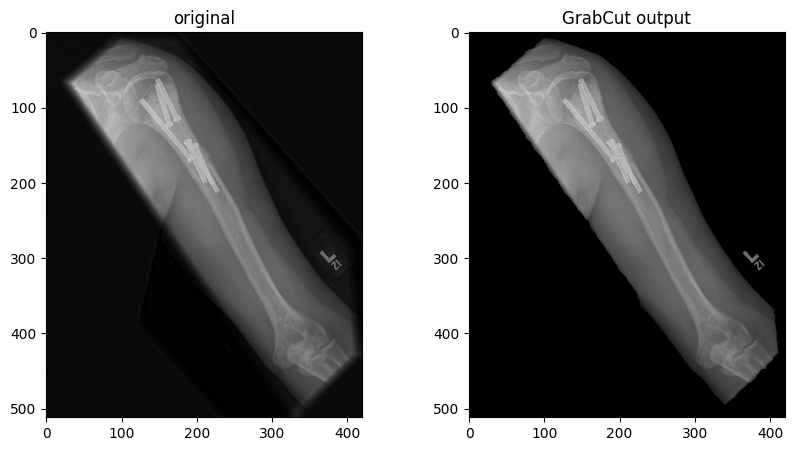

In [6]:
# 2. implement GrabCut

#grabcut needs image opened in cv2
img = cv2.imread(image_path)

mask = np.zeros(img.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# 6 is the iteration, 
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,6,cv2.GC_INIT_WITH_RECT)


mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
result = img * mask[:, :, np.newaxis]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("original")
ax[1].imshow(result, cmap='gray')
ax[1].set_title("GrabCut output")

### Loop on multiple images

In [9]:
folder_path = "/home/clr/Thesis/augmentations/sample images/"
output_folder = "/home/clr/Thesis/augmentations/grabCut_outputs/"
image_files = os.listdir(folder_path)

def get_rect(image_path):
    image = Image.open(image_path)
    image_orig = np.array(image)
    if len(image_orig.shape) == 2:
        gray_image = image_orig  # Grayscale image already
    else:
        gray_image = cv2.cvtColor(image_orig, cv2.COLOR_BGR2GRAY)

    contours, _ = cv2.findContours(np.uint8(gray_image), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    best_rect = None
    best_rect_area = 0

    for contour in contours:
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box_area = rect[1][0] * rect[1][1]

        if box_area > best_rect_area:
            best_rect = box
            best_rect_area = box_area

    min_x = int(min(best_rect[:,0]))
    min_y = int(min(best_rect[:,1]))
    max_x = int(max(best_rect[:,0]))
    max_y = int(max(best_rect[:,1]))
    w = max_x - min_x
    h = max_y - min_y
    x = min_x
    y = min_y

    rect = (x , y, w, h)

    return rect


for img in image_files:
    image_path = folder_path + img
    
    rect = get_rect(image_path)
    
    # 2. implement GrabCut
    #grabcut needs image opened in cv2
    image2 = cv2.imread(image_path)

    mask = np.zeros(image2.shape[:2], np.uint8)

    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    # 6 is the iteration, 
    cv2.grabCut(image2,mask,rect,bgdModel,fgdModel,6,cv2.GC_INIT_WITH_RECT)


    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    result = image2 * mask[:, :, np.newaxis]
    cv2.imwrite(output_folder + img, result)
